In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import cv2
import joblib as jb

pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 10000)
warnings.filterwarnings('ignore')


# Read Datasets

In [2]:
df = pd.read_csv('emnist-balanced-train.csv' , header=None)
char_map = pd.read_csv('emnist-balanced-mapping.txt' , delimiter=' ', header=None , index_col=0 , squeeze=True)

df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7,32,36,21,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,33,113,124,81,22,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,77,158,243,249,232,159,95,34,20,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,124,213,254,254,254,247,234,202,154,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,114,203,254,254,254,254,252,242,207,59,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45,122,230,245,252,254,254,254,249,207,91,36,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,67,170,204,236,254,254,254,254,244,163,96,33,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,24,45,160,251,254,255,254,254,247,234,190,121,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,67,123,222,254,254,255,255,254,254,254,244,202,32,0,0,0,0,0,0,0,0,0,0,0,0,0,1,10,123,195,247,254,254,255,255,255,254,254,243,200,32,0,0,0,0,0,0,0,0,0,0,0,0,0,20,77,220,247,254,254,254,252,251,252,254,252,177,95,7,0,0,0,0,0,0,0,0,0,0,0,0,0,50,139,250,254,254,

# Get Labels

In [3]:
mapping = {}
for index, label in enumerate(char_map):
    mapping[index] = chr(label)

In [4]:
mapping

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'A',
 11: 'B',
 12: 'C',
 13: 'D',
 14: 'E',
 15: 'F',
 16: 'G',
 17: 'H',
 18: 'I',
 19: 'J',
 20: 'K',
 21: 'L',
 22: 'M',
 23: 'N',
 24: 'O',
 25: 'P',
 26: 'Q',
 27: 'R',
 28: 'S',
 29: 'T',
 30: 'U',
 31: 'V',
 32: 'W',
 33: 'X',
 34: 'Y',
 35: 'Z',
 36: 'a',
 37: 'b',
 38: 'd',
 39: 'e',
 40: 'f',
 41: 'g',
 42: 'h',
 43: 'n',
 44: 'q',
 45: 'r',
 46: 't'}

# Split Dataset

In [5]:
X_df = df.iloc[:,1:]
y_df = df.iloc[ : , 0 ]

# Rotate Images

In [6]:
def rotate(image):
    image = image.reshape([28, 28])
    image = np.fliplr(image)
    image = np.rot90(image)
    return image

In [7]:
X_df = np.asarray(X_df)
X_df = np.apply_along_axis(rotate, 1, X_df)

# Images after rotate

Target is: W


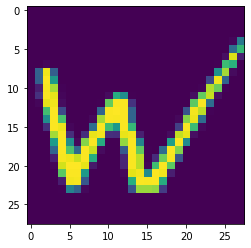

In [8]:
index=3333

print("Target is:" , mapping[ (y_df[index]) ] )

plt.imshow(X_df[index])

In [9]:
X_df.shape

(112800, 28, 28)

In [10]:
nsamples, nx, ny = X_df.shape
X_df = X_df.reshape(nsamples,nx*ny)

# Split to Fit

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size= 0.15, random_state=22)

# Decision Tree

In [12]:
DT_model = DecisionTreeClassifier(max_depth=35 , min_samples_split=80)
DT_model.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=35, min_samples_split=80)

In [13]:
y_pred_DT = DT_model.predict(X_test)

### Accuracy

In [14]:
f1_score(y_pred_DT,y_test , average='weighted')

0.5723125341876227

In [15]:
accuracy_score(y_pred_DT,y_test)

0.5709219858156028

# Random Forest

In [16]:
RF_model = RandomForestClassifier(n_estimators=350 , criterion='gini', max_depth=30, min_samples_split=40 , min_samples_leaf=24, n_jobs= -1)

In [17]:
RF_model.fit(X_train , y_train)

RandomForestClassifier(max_depth=30, min_samples_leaf=24, min_samples_split=40,
                       n_estimators=350, n_jobs=-1)

In [18]:
y_pred_RF = RF_model.predict(X_test)

### Accuracy

In [19]:
f1_score(y_pred,y_test , average='weighted')

0.766343809474362

In [20]:
accuracy_score(y_pred,y_test)

0.7627659574468085

# Visualize 

In [21]:
cf = confusion_matrix(y_test, y_pred)

In [22]:
pd.DataFrame(cf).style.background_gradient(cmap = "inferno")

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46
0,238,0,0,0,0,0,1,0,2,0,0,1,0,18,1,0,0,0,0,0,0,0,0,0,88,1,4,0,0,0,4,0,0,0,0,0,2,2,0,0,0,1,0,0,0,0,0
1,0,251,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39,6,0,48,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,2
2,0,0,257,1,0,0,0,3,2,0,1,1,0,3,0,0,3,0,0,5,1,1,0,1,0,0,2,4,0,0,0,0,2,0,0,52,6,4,0,0,1,0,0,0,0,0,0
3,0,0,5,312,0,2,0,2,2,0,0,6,0,1,0,0,0,0,0,13,0,0,0,0,0,0,1,0,6,0,0,0,0,0,0,1,0,2,1,0,1,2,0,0,0,0,1
4,0,0,0,0,298,0,0,0,0,3,13,0,0,0,0,0,0,4,0,0,0,0,0,3,0,1,0,0,0,0,6,8,1,0,19,0,1,0,3,0,4,0,2,0,4,1,11
5,0,1,0,7,0,263,1,0,3,2,0,2,0,1,1,0,5,0,0,4,0,0,0,0,0,0,0,0,70,1,0,0,0,1,0,0,0,0,2,0,0,1,0,0,1,5,0
6,1,0,0,0,0,0,315,0,0,0,0,0,5,0,3,0,13,0,1,0,0,1,0,0,0,0,0,0,0,0,5,1,3,0,0,0,0,37,1,0,0,0,1,0,0,1,0
7,0,1,0,0,1,0,0,335,0,5,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,3,0,0,0,6,0,0,0,0,2,0,0,0,0,0,1,0,0,3,0,0,8
8,1,5,0,4,0,1,0,0,264,1,0,33,0,4,4,1,1,0,0,0,1,0,0,0,0,5,1,1,0,0,0,2,0,0,1,0,0,0,2,0,4,0,0,0,14,4,2
9,0,0,0,0,5,0,0,7,0,327,2,1,0,0,0,0,0,0,0,0,0,0,0,0,2,1,6,1,0,0,0,0,0,0,3,0,1,0,0,0,1,9,0,0,32,0,0


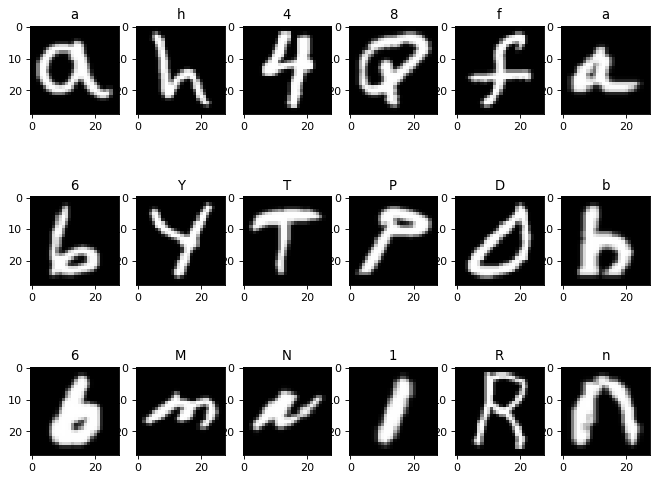

In [24]:
plt.figure(figsize=(10, 8), dpi=80)
for i in range(100, 118):
    plt.subplot(3,6,i-99)
    plt.imshow(X_test[i].reshape(28, 28) , cmap=plt.cm.gray)
    plt.title(mapping[y_pred[i]])

# Test external sample


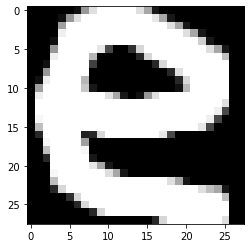

In [31]:
img = cv2.imread('Untitled.png')
plt.imshow(img)

In [32]:
BW = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
resized_img = cv2.resize(BW , (28,28) , interpolation = cv2.INTER_AREA)
final_img = resized_img.reshape(-1)
y_pred_samp = RF_model.predict([final_img])

Predicted e


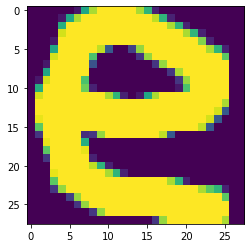

In [33]:
print("Predicted " + mapping[ ( y_pred_samp[0] ) ]  )
im = final_img
im = rotate(im)
im = rotate(im)
plt.imshow(im)

# Saving The Model

In [28]:
jb.dump(RF_model , 'rf_model.sav')

['rf_model.sav']

In [29]:
rrr = jb.load("rf_model.sav")

# Test the saved Model

Predicted e


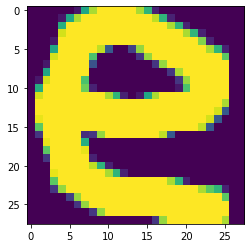

In [30]:
print("Predicted " + mapping[ ( rrr.predict([final_img])[0] ) ]  )
im = final_img
im = rotate(im)
im = rotate(im)
plt.imshow(im)